In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [51]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
data.shape

(768, 9)

In [53]:
np.sort(data['Age'].unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81], dtype=int64)

In [54]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Pearson-Corelation with 'Outcome'

<AxesSubplot:>

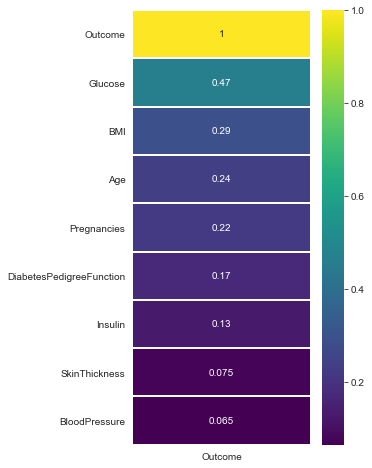

In [55]:
plt.figure(figsize=(4,8))
cor = data.corr()[['Outcome']].sort_values(by='Outcome',ascending=False)
sns.heatmap(cor,annot=True,linewidths=1,cmap='viridis')

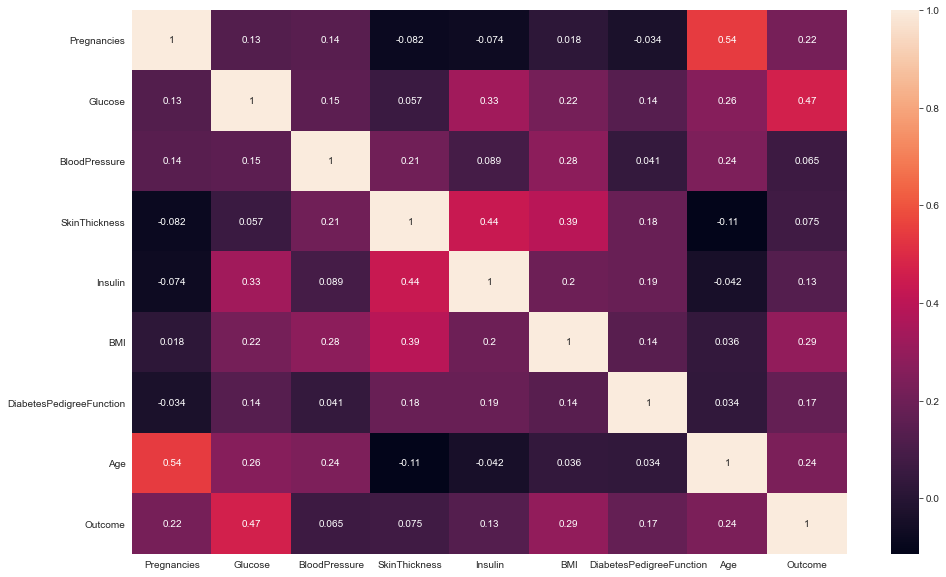

In [56]:
plt.figure(figsize=(16,10))
corrmat = data.corr()
index_corr = corrmat.index
sns.heatmap(data[index_corr].corr(),annot=True)
plt.show()

In [57]:
#Null-plot

In [58]:
col = [col for col in data.columns if col!= 'Age' and col!= 'Outcome']
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

In [59]:
for i in col:
    data[i] = data[i].replace({0:np.NaN})

In [60]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [61]:
data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [62]:
for i in col:
    data[i] = data[i].fillna(data[i].median())

#### Chequing Null Values

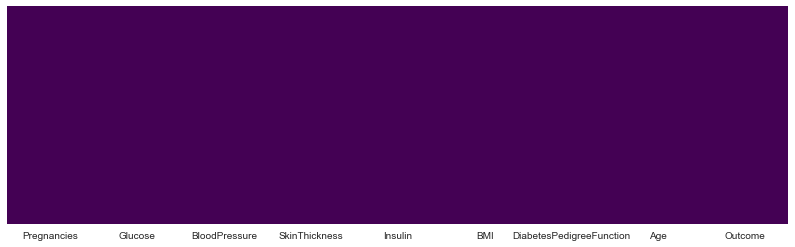

In [72]:
plt.figure(figsize=(14,4))
sns.heatmap(data.isna(),cmap='viridis',cbar=False,yticklabels=False)
plt.show()

In [63]:
true = data[data['Outcome']== 1]
false = data[data['Outcome']== 0]

In [64]:
len(true),len(false)

(268, 500)

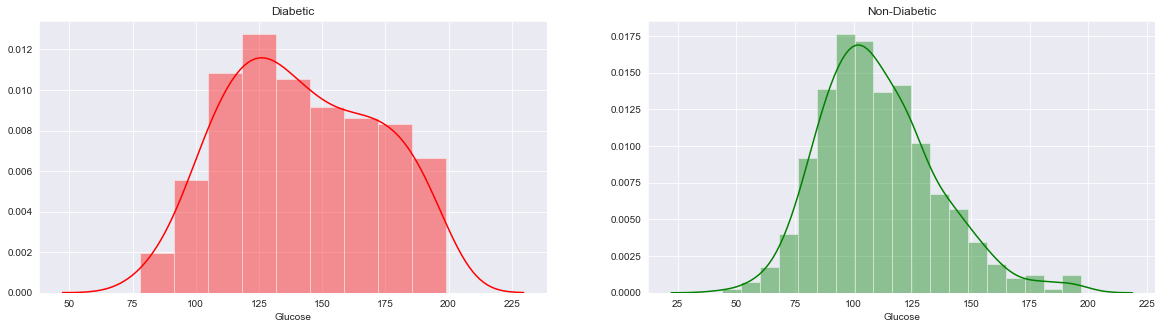

In [74]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(true['Glucose'],ax=ax1,color='r')
ax1.set_title('Diabetic')
sns.distplot(false['Glucose'],ax=ax2,color='g')
ax2.set_title('Non-Diabetic')
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


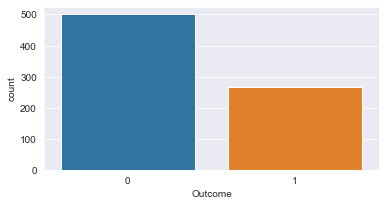

In [75]:
plt.figure(figsize=(6,3))
sns.countplot(data['Outcome'])
print(data.Outcome.value_counts())
plt.show()

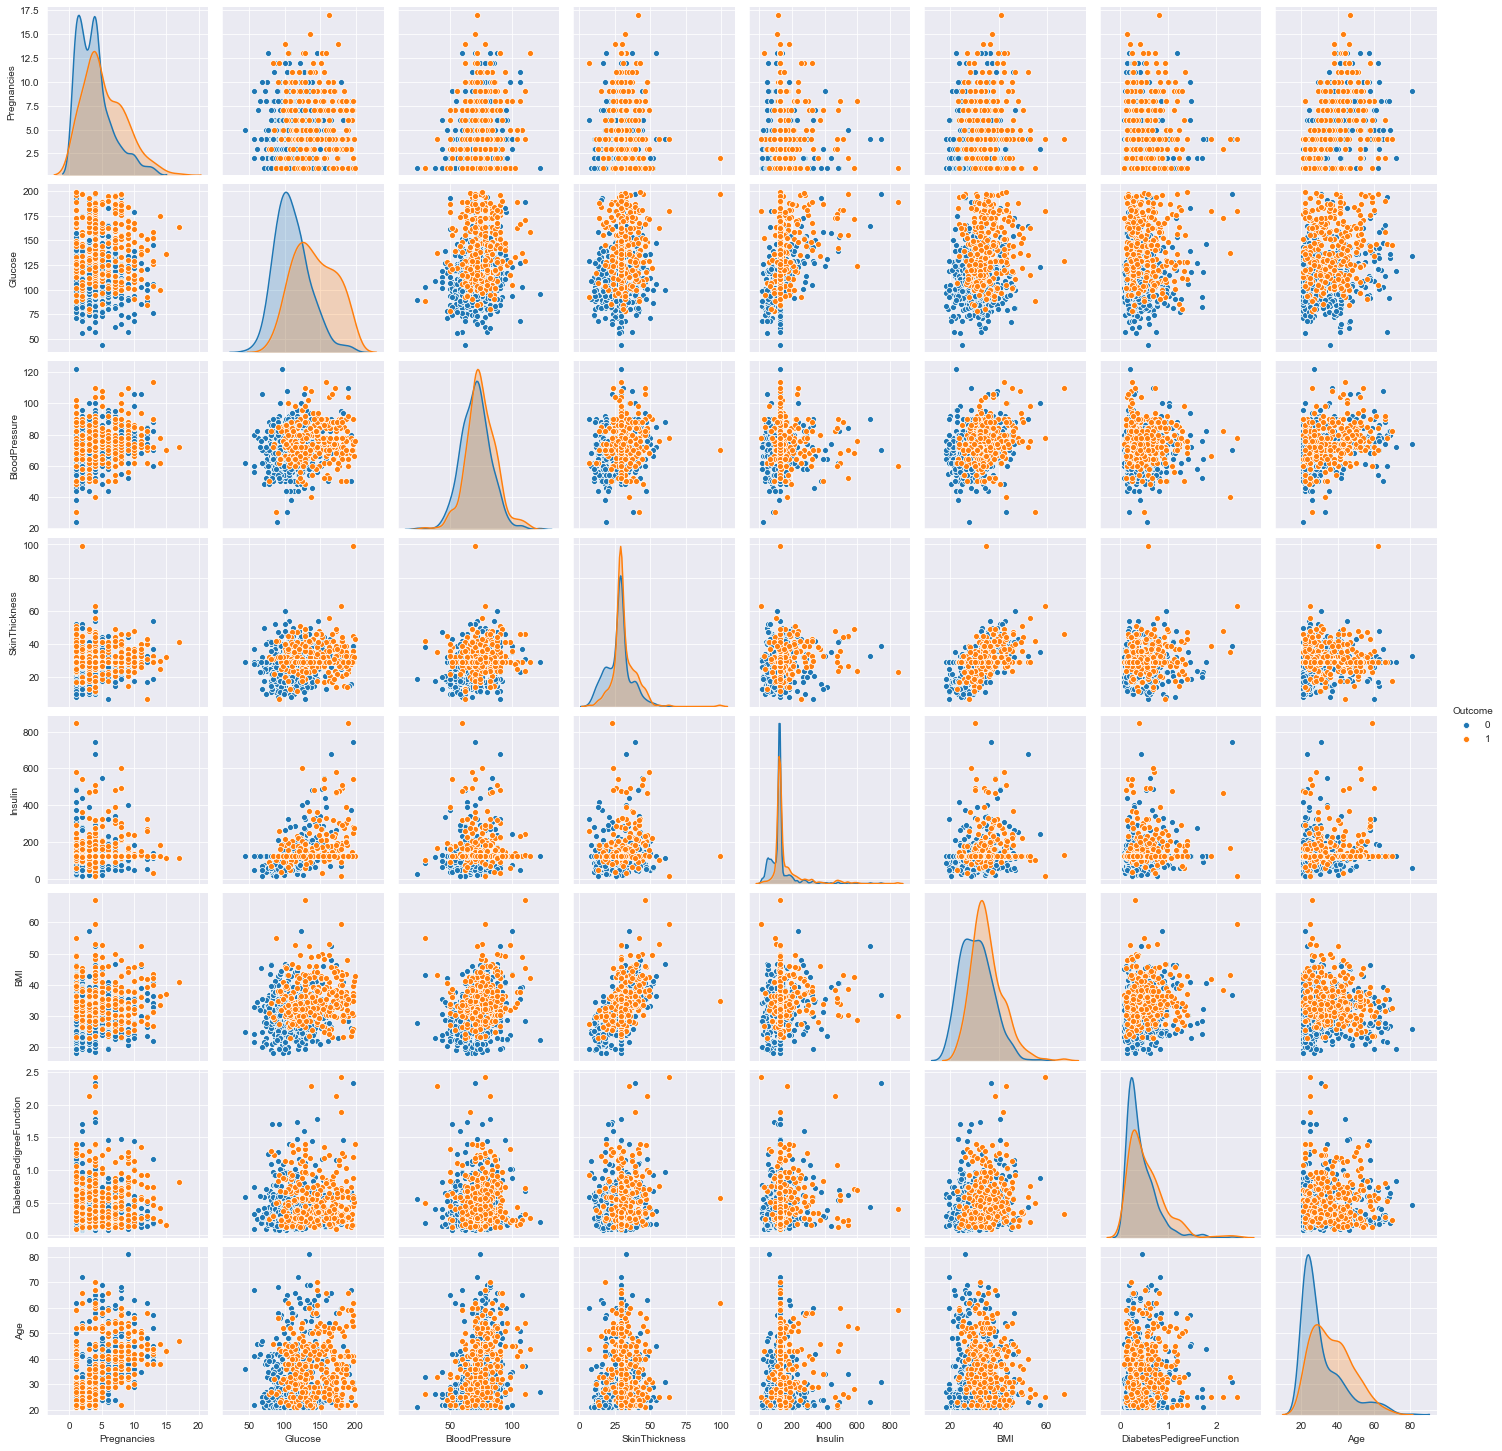

In [67]:
sns.pairplot(data,hue='Outcome')
plt.show()

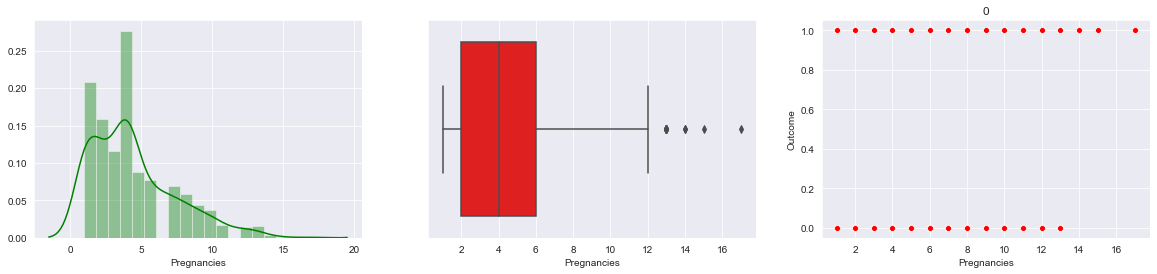

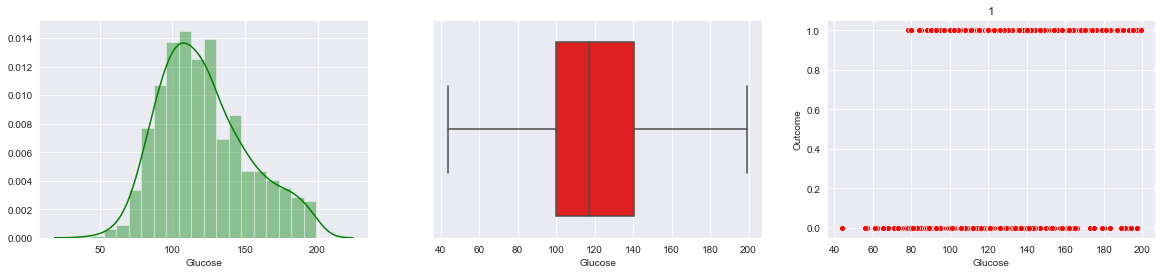

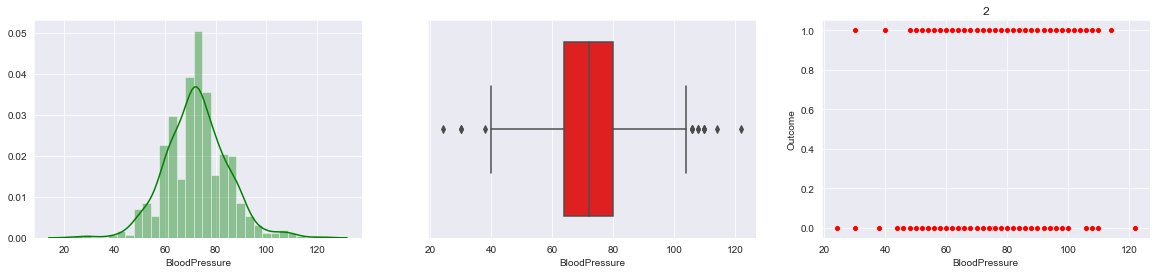

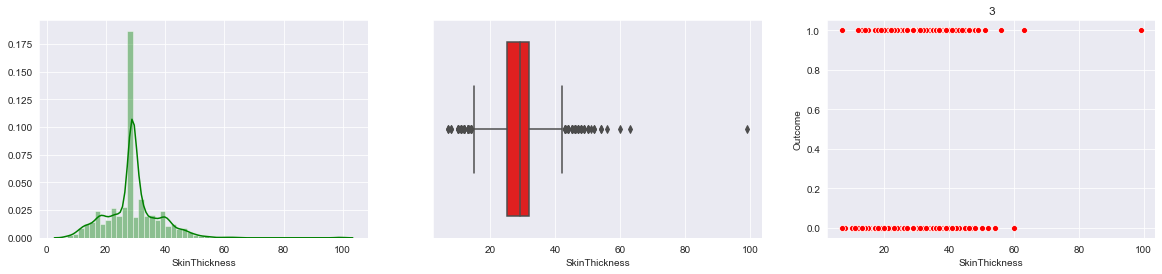

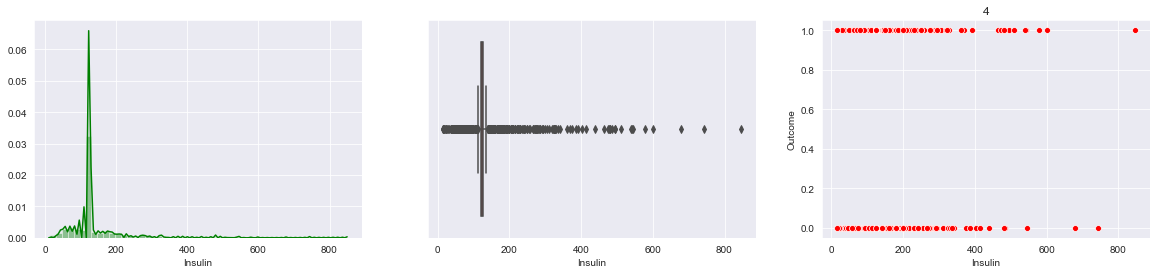

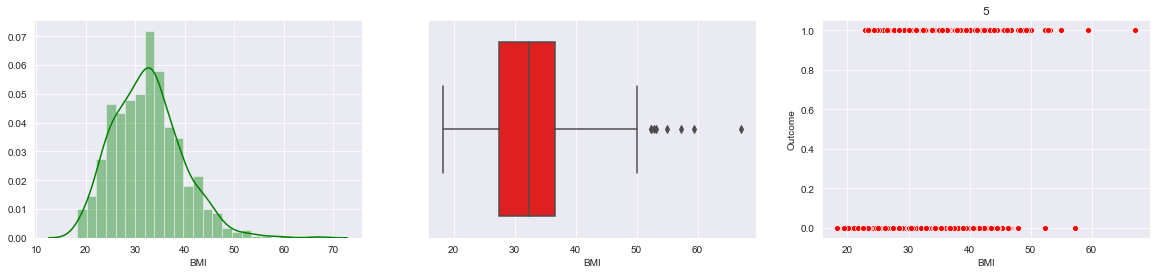

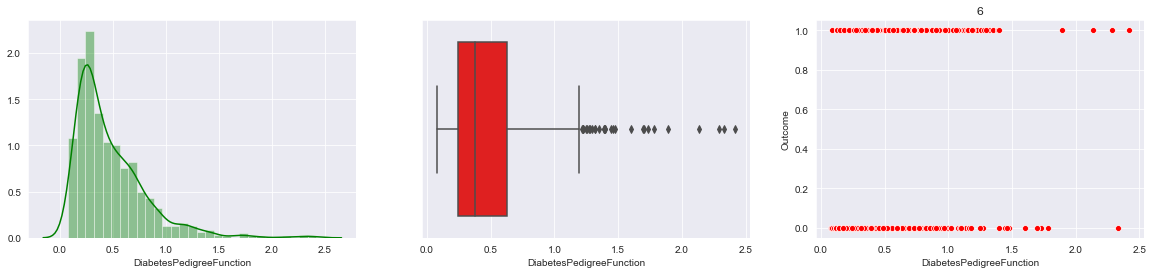

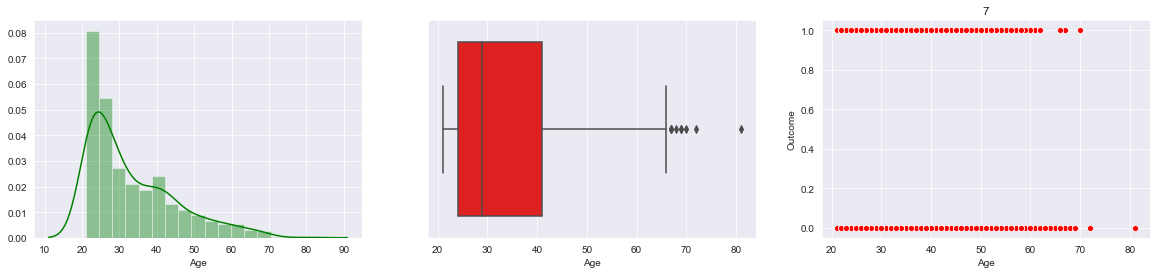

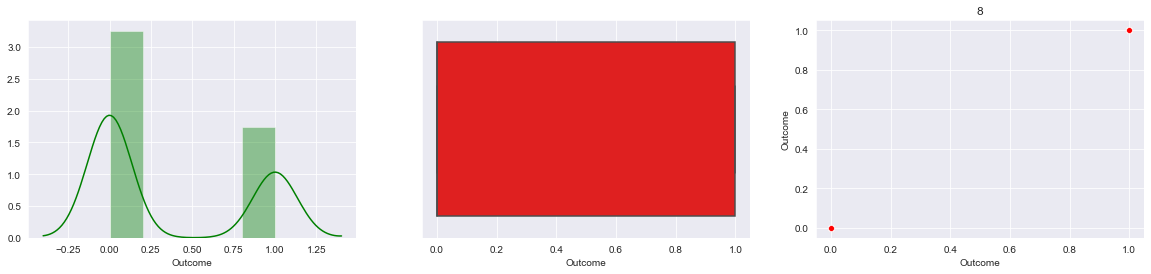

In [68]:
for col in range(len(data.columns)):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
    a = data[data.columns[col]]
    b = data['Outcome']
    sns.distplot(a,color='g',ax=ax1)
    sns.boxplot(a,color='r',ax=ax2)
    sns.scatterplot(a,b,color='r',ax=ax3)
    plt.title(col)
    plt.show()

In [92]:
X = data.drop('Outcome',1).copy()
y = data['Outcome'].copy()

In [93]:
del data

# My KNN CLASSIFIER MODEL with Tunning

In [148]:
def KNN_TUNING(X,y):
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report,confusion_matrix 
    scaler=StandardScaler()
    df1=scaler.fit_transform(X)
    ts = eval(input('Test size :'))
    rs = eval(input('Random State :'))
    x=pd.DataFrame(df1,columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=ts, random_state=rs)


    error_rate=[]
    for i in range(1,52,2):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    d = pd.DataFrame(error_rate)
    d1=d[d[0]==d[0].min()]
    k=d1.index[0]+1
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    preda=knn.predict(X_train)
    pr = knn.predict(X)

    print("Minimum  error for k =",k)
    print('\n')
    print('Classification Report for Test set is :\n',classification_report(y_test,pred))
    print('\n')
    print('Classification Report for Training set is :\n',classification_report(y_train,preda))
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
    sns.heatmap(confusion_matrix(y_test,pred),cbar=False,annot=True,fmt='.4g',cmap='viridis',ax=ax1)
    ax1.set_title('Confusion Metrix for TEST DATA')
    sns.heatmap(confusion_matrix(y_train,preda),cbar=False,annot=True,fmt='.4g',cmap='viridis',ax=ax2)
    ax2.set_title('Confusion Metrix for TRAIN DATA')

    if pred[1] == 1 or pred[1] == 0:
        fig = plt.figure(figsize=(16,2))
        plt.bar(np.arange(1,(len(X_test)+1)),(pred-y_test),color='r',lw = 0.3)
        plt.plot(np.arange(1,(len(X_test)+1)),np.zeros(len(X_test)),color='k',lw = 5)
        plt.title('[Confusion Graph] : Upper Red Line = False Positive & Lower Red Line = False Negetive')
        plt.xlabel('Test Data Range')
        plt.ylabel('[Prediction - Test Data Set] = Red line')
        sns.despine(left=True)

    else:
        pass
    return pr

Test size :0.2
Random State :0
Minimum  error for k = 5


Classification Report for Test set is :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       107
           1       0.67      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.81      0.81      0.81       154



Classification Report for Training set is :
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       393
           1       0.75      0.71      0.73       221

    accuracy                           0.81       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614



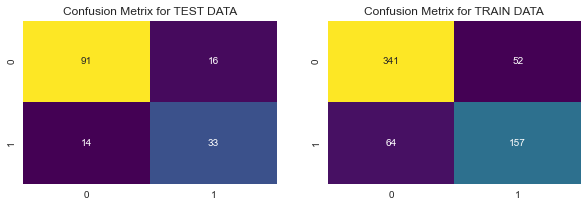

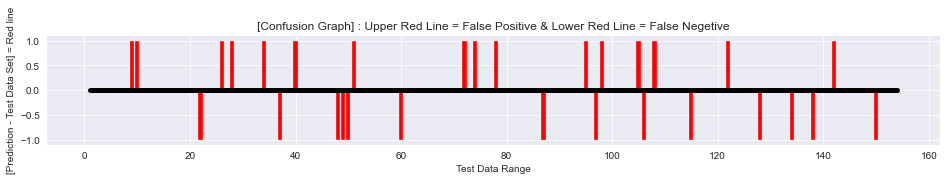

In [150]:
x = KNN_TUNING(X,y)

In [151]:
def Prediction(data= x):
    index = int(input('Enter index :'))
    H = x[index]

    if H == 1:
        print('\nPrediction: DIABETIC')
    else:
        print('\nPrediction: NON-DIABETIC')

In [152]:
Prediction()

Enter index :0

Prediction: DIABETIC


In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
y_pred = knn.predict(x_test)
y_pred

In [ ]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')